Let us first look differentiating among the terms classification, localization and detection. We hear these terms often in the image processing world and these are distinctive to each other in their applications.

1. Classification — Refers to identifying if a given object is present inside an image or not. Common example: Cat or no-cat.
2. Localization — Refers to not only identifying is a given object is present inside an image, but also distinguishing the object’s location using a bounding box.
3. Detection — Simply refers to multiple localizations in a single image.

#YOLO: Real-Time Object Detection

You only look once (YOLO) is a state-of-the-art, real-time object detection system. On a Pascal Titan X it processes images at 30 FPS and has a mAP of 57.9% on COCO test-dev.

#How It Works (By Joseph Redmon - https://pjreddie.com/darknet/yolo/)

Prior detection systems repurpose classifiers or localizers to perform detection. They apply the model to an image at multiple locations and scales. High scoring regions of the image are considered detections.

We use a totally different approach. We apply a single neural network to the full image. This network divides the image into regions and predicts bounding boxes and probabilities for each region. These bounding boxes are weighted by the predicted probabilities.



Our model has several advantages over classifier-based systems. It looks at the whole image at test time so its predictions are informed by global context in the image. It also makes predictions with a single network evaluation unlike systems like R-CNN which require thousands for a single image. This makes it extremely fast, more than 1000x faster than R-CNN and 100x faster than Fast R-CNN. See our paper for more details on the full system.

##What's New in Version 3?

YOLOv3 uses a few tricks to improve training and increase performance, including: multi-scale predictions, a better backbone classifier, and more.

#Check CUDA release version

In [0]:
!/usr/local/cuda/bin/nvcc --version


!wget http://people.cs.uchicago.edu/~kauffman/nvidia/cudnn/cudnn-10.2-linux-x64-v7.6.5.32.tgz 


# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xvzf /content/cudnn-10.2-linux-x64-v7.6.5.32.tgz
!chmod a+r /content/cuda/include/cudnn.h
!cat /content/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

#Detection Using A Pre-Trained Model

In [0]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/pjreddie/darknet'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q $git_repo_url
  #!cd $project_name && pip install -q -r requirement.txt


In [0]:
%cd /content/darknet/


In [0]:
#Compile Darknet
!make

#Download the Yolo darknet. 

In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights



In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

#See the results

In [0]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
# Show the result using the helper imgShow()
imShow('predictions.jpg')

#Explanation

Darknet prints out the objects it detected, its confidence, and how long it took to find them. We didn't compile Darknet with OpenCV so it can't display the detections directly. Instead, it saves them in predictions.png. You can open it to see the detected objects. Since we are using Darknet on the CPU it takes around 6-12 seconds per image. If we use the GPU version it would be much faster.

I've included some example images to try in case you need inspiration. Try data/eagle.jpg, data/dog.jpg, data/person.jpg, or data/horses.jpg!

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/eagle.jpg -dont-show

In [0]:
# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg 

In [0]:
# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/horses.jpg 

In [0]:
# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/kite.jpg

In [0]:
# Show the result using the helper imgShow()
imShow('predictions.jpg')

## Now on Gun Detection Dataset


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!unzip "/content/drive/My Drive/DL_datasets/darknet.zip"

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/images/armas1.jpg

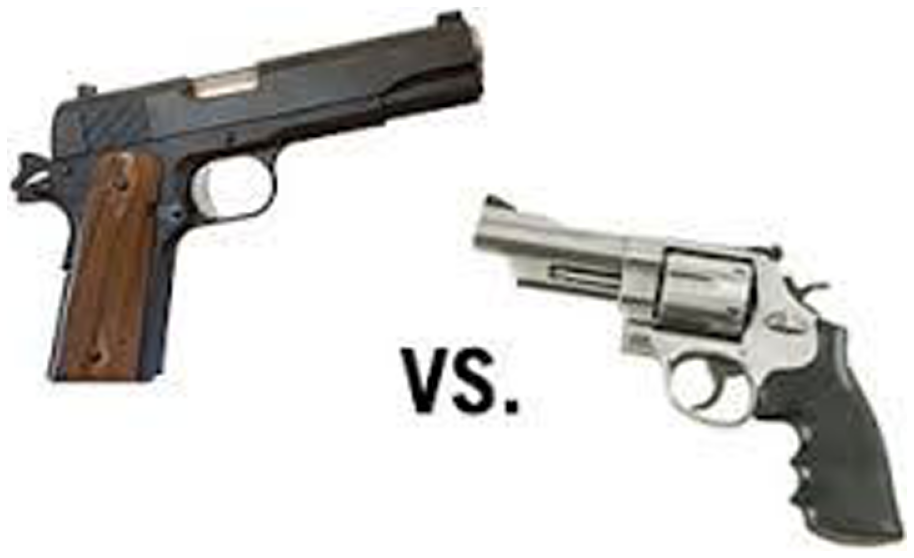

In [24]:
# Show the result using the helper imgShow()
imShow('predictions.jpg')